<a href="https://colab.research.google.com/github/elsymaharaniputri/TA-psyassist/blob/main/Salinan_dari_AUTODSTILL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup

In [ ]:
!pip install autodistill-yolov8 autodistill-detic roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

 Unduh Dataset dari Roboflow(Yang sudah di labeli)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RANNDjV1GXCcNeGuFKGR")
project = rf.workspace("ta-9k6y4").project("deteksi-wajah-x1ymk")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-wajah-1 in yolov8:: 100%|██████████| 408/408 [00:00<00:00, 4224.62it/s]


Latih Teacher Model (Misalnya YOLOv8)

In [ ]:
from ultralytics import YOLO

# Load model YOLOv8 pra-pelatihan
teacher_model = YOLO("yolov8n.pt")  # Gunakan model yang lebih besar seperti yolov8x jika diperlukan

# Latih teacher model dengan dataset dari Roboflow
results = teacher_model.train(data=f"{dataset.location}/data.yaml", epochs=100)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.76 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.11.11 to

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Melabeli Data dan Konversi Ke Yolo Untuk DIlatih Teacher Model

In [ ]:
# import os
# from autodistill_grounded_sam import GroundedSAM
# from autodistill.detection import CaptionOntology

# # Inisialisasi model dengan ontologi
# base_model = GroundedSAM(ontology=CaptionOntology({"stress": "stress"}))

# # Folder input dan output
# input_folder = "/content/drive/MyDrive/DATASET/STRESS"  # Ganti dengan path folder gambar Anda
# output_folder = "/content/labeled-images"  # Ganti dengan path folder untuk menyimpan hasil label

# # Pastikan folder output ada
# os.makedirs(output_folder, exist_ok=True)

# # Melabeli setiap gambar dalam folder
# for filename in os.listdir(input_folder):
#     if filename.endswith(('.png', '.jpg', '.jpeg')):  # Pastikan hanya memproses gambar
#         image_path = os.path.join(input_folder, filename)

#         # Melabeli gambar
#         labels = base_model.label(image_path)

#         # Simpan hasil label ke file teks
#         with open(os.path.join(output_folder, f"{filename}.txt"), 'w') as f:
#             f.write(str(labels))

#         print(f"Processed {filename}: {labels}")  # Menampilkan hasil di konsol






In [ ]:
!pip install roboflow
!pip install autodistill autodistill-grounded-sam
from autodistill_grounded_sam import GroundedSAM
!pip install --upgrade autodistill-grounded-sam
from autodistill.detection import CaptionOntology

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 20.1 MB/s eta 0:00:00


In [ ]:
ontology = CaptionOntology({
    "stress": "stress",
})
base_model = GroundedSAM(ontology=ontology)
input_folder = "/content/drive/MyDrive/DATASET/STRESS"  # Path to your input images
output_folder = "/content/drive/MyDrive/DATASET/OUTPUT"  # Path to save labeled images


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


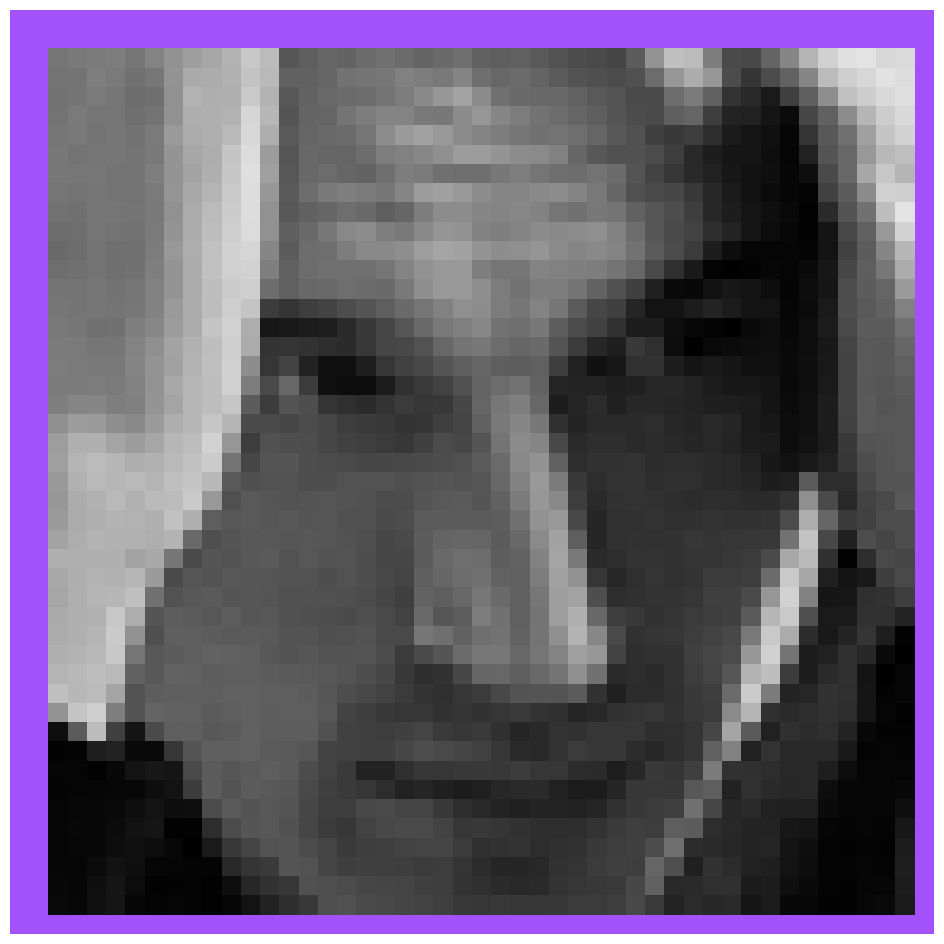

Labeling /content/drive/MyDrive/DATASET/STRESS/Training_99625114.jpg: 100%|██████████| 109/109 [4:31:10<00:00, 149.27s/it]


Labeled dataset created - ready for distillation.


In [ ]:
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv

input_folder = "/content/drive/MyDrive/DATASET/STRESS"  # Path to your input images
output_folder = "/content/drive/MyDrive/DATASET/OUTPUT"  # Path to save labeled images

# Get a list of all files in the directory
all_files = os.listdir(input_folder)
# Filter out files ending with '_labeled'
image_files = [f for f in all_files if not f.endswith('_labeled')]
# Randomly choose one of the remaining files
IMAGE_PATH = os.path.join(input_folder, random.choice(image_files))

results = base_model.predict(IMAGE_PATH).with_nms()
results = results[results.confidence > 0.3]

image = cv2.imread(IMAGE_PATH)

mask_annotator = sv.BoxAnnotator()

annotated_image = mask_annotator.annotate(
    image.copy(), detections=results
)

sv.plot_image(image=annotated_image)

# Memanggil metode label dengan parameter yang benar
base_model.label(input_folder=input_folder, output_folder=output_folder, extension="jpg")

In [ ]:
# !pip install autodistill autodistill-grounded-sam
# from autodistill_grounded_sam import GroundedSAM
# !pip install --upgrade autodistill-grounded-sam
# from autodistill.detection import CaptionOntology

# ontology = CaptionOntology({
#     "stress": "stress",
# })
# base_model = GroundedSAM(ontology=ontology)
# input_folder = "/content/drive/MyDrive/DATASET/STRESS"  # Path to your input images
# output_folder = "/content/runs"  # Path to save labeled images

# base_model.label_folder(
#     input_folder=input_folder,
#     output_folder=output_folder
# )

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


AttributeError: 'GroundedSAM' object has no attribute 'label_folder'

In [ ]:
# Melatih Model Target
# Setelah dataset dilabeli dan dikonversi, Anda dapat melatih model target seperti YOLOv8 dengan dataset yang telah dilabeli.

# from autodistill_yolov8 import YOLOv8

# target_model = YOLOv8("yolov8n.pt")
# target_model.train("./labeled-images/data.yaml", epochs=50)


Menggunakan Teacher Model untuk Menghasilkan Soft Labels

In [ ]:
import os
import numpy as np

# Fungsi untuk menghasilkan soft labels
def generate_soft_labels(model, image_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        results = model(image_path)  # Prediksi dengan teacher model
        soft_labels = results[0].probs  # Ambil probabilitas kelas (soft labels)
        np.save(os.path.join(output_folder, image_name.replace(".jpg", ".npy")), soft_labels)

# Path ke folder gambar dan output soft labels
image_folder = f"{dataset.location}/train/images"
output_folder = "/content/soft_labels"

# Generate soft labels
generate_soft_labels(teacher_model, image_folder, output_folder)

Latih Student Model dengan Soft Labels

In [ ]:
# Load model YOLOv8 yang lebih kecil sebagai student model
student_model = YOLO("yolov8n.pt")  # Misalnya, gunakan YOLOv8n

# Latih student model dengan soft labels
results = student_model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    teacher_soft_labels=output_folder  # Gunakan soft labels dari teacher model
)